In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#!pip install yellowbrick
#!pip install -U gensim  
!pip install wordcloud --no-cache-dir
#!pip install --upgrade setuptools

     |████████████████████████████████| 220 kB 3.3 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/ameyanaik/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/vp/6cgcf4jd0b30jh77k9prwm7h0000gn/T/pip-install-0yeeij_8/wordcloud_97c4d59f06b147d78eafd51c3aeef1be/setup.py'"'"'; __file__='"'"'/private/var/folders/vp/6cgcf4jd0b30jh77k9prwm7h0000gn/T/pip-install-0yeeij_8/wordcloud_97c4d59f06b147d78eafd51c3aeef1be/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/vp/6cgcf4jd0b30jh77k9prwm7h0000gn/T/pip-wheel-mic4cv5k
       cwd: /private/var/folders/vp/6cgcf4jd0b30jh77k9prwm7h0000gn/T/pip-install-0yeeij_8/wordcloud_97c4d59f06b147d78eafd51c3aeef1be/
  Complete output (25 lines):
  running bdist_wheel
  running build
  running build_py
  creating 

In [3]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import json
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize
import string
from collections import defaultdict, Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import csv        
from ast import literal_eval
from tqdm import tqdm


%matplotlib inline

plt.style.use('seaborn')
nltk.download('punkt')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
os.listdir()

['data_Eminem.txt',
 'data_Kanye_West.txt',
 'data_Adele.txt',
 'data_Blink-182.txt',
 'data_Bob_Marley.txt',
 'data_Radiohead.txt',
 'data_Michael_Jackson.txt',
 'data_Bruno_Mars.txt',
 'data_Bruce_Springsteen.txt',
 '.ipynb_checkpoints',
 'profanities.txt',
 'd2v.model',
 'doc_tensor.w2v',
 'word2vec2tensor.py',
 'lyrics_tensor.tsv',
 'lyrics_metadata.tsv']

In [ ]:
os.chdir('drive/MyDrive')

In [ ]:
os.chdir('lyrics_ameya') #-> navigate to the folder where your lyrics are

In [ ]:
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
excluded_words = list(set(stopwords_list.decode().splitlines())) + ['na na', 'li' 'yeah', 'ya', 'na', 'dont', 'oh', 'oh oh', 'aint', 'ill', 'ive', 'didnt', 'gon', 'coming', 'gonna', 'wanna', 'thereall', 'thing'] + open('profanities.txt', 'r').read().splitlines() 

In [ ]:
os.listdir()

['data_Eminem.txt',
 'data_Kanye_West.txt',
 'data_Adele.txt',
 'data_Blink-182.txt',
 'data_Bob_Marley.txt',
 'data_Radiohead.txt',
 'data_Michael_Jackson.txt',
 'data_Bruno_Mars.txt',
 'data_Bruce_Springsteen.txt',
 '.ipynb_checkpoints',
 'profanities.txt',
 'd2v.model',
 'doc_tensor.w2v',
 'word2vec2tensor.py',
 'lyrics_tensor.tsv',
 'lyrics_metadata.tsv']

In [ ]:
def clean_data(lyrics_st):
    lyrics_st = lyrics_st.translate(str.maketrans('', '', string.punctuation)) # removing punctuations
    lyrics_st1 = ' '.join([w for w in lyrics_st.split() if len(w)>2]) # removing words smaller than 3 characters
    lyrics_cleaned  = [word for word in lyrics_st1.split() if word.lower() not in excluded_words] # removing stopwords + my word list + punctuation
    return ' '.join(lyrics_cleaned) # Appending Xi to lyrics

data_Eminem.txt


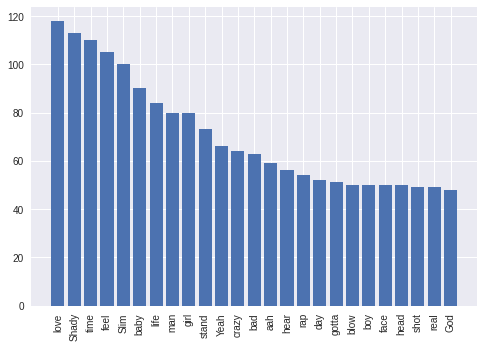

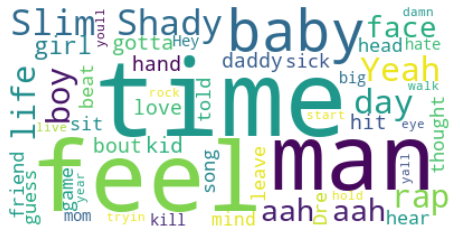

data_Kanye_West.txt


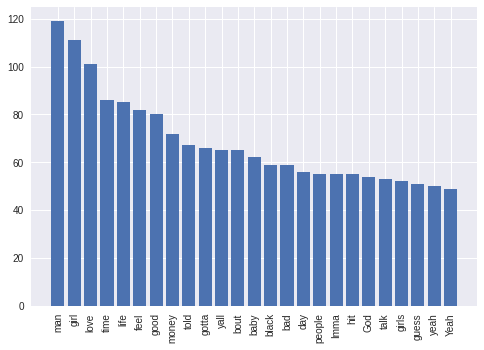

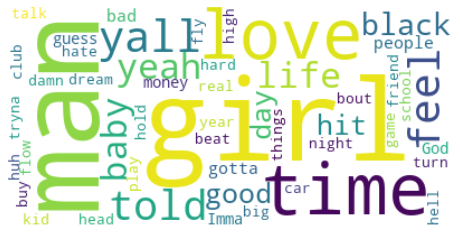

data_Adele.txt


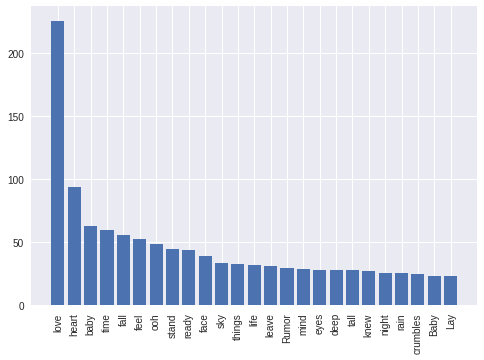

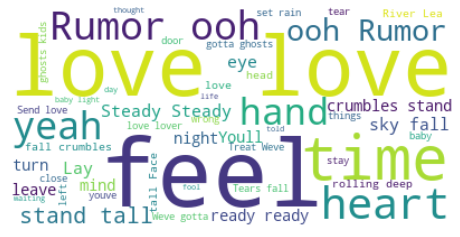

data_Blink-182.txt


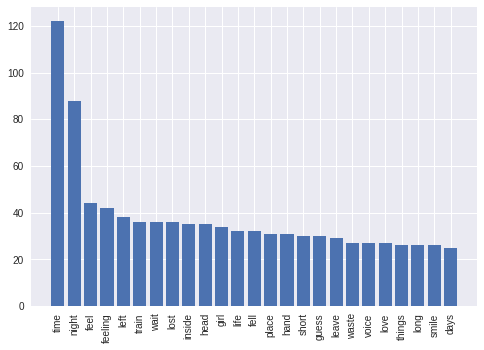

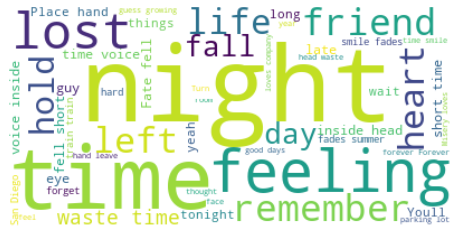

data_Bob_Marley.txt


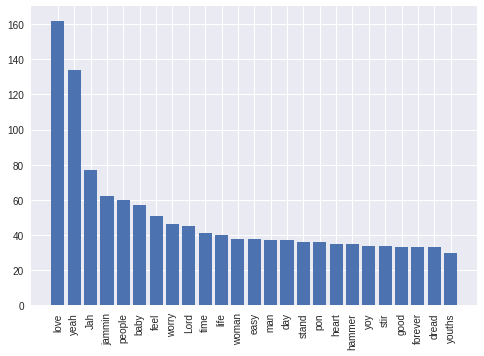

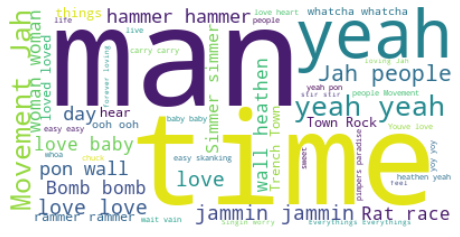

data_Radiohead.txt


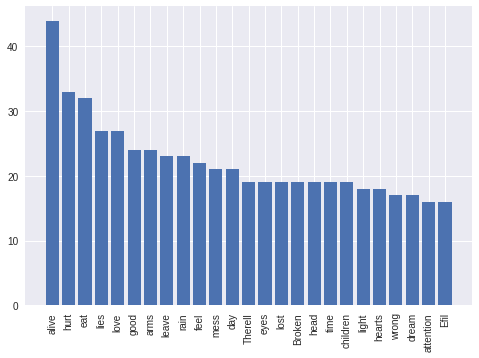

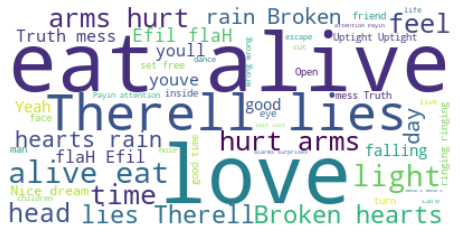

data_Michael_Jackson.txt


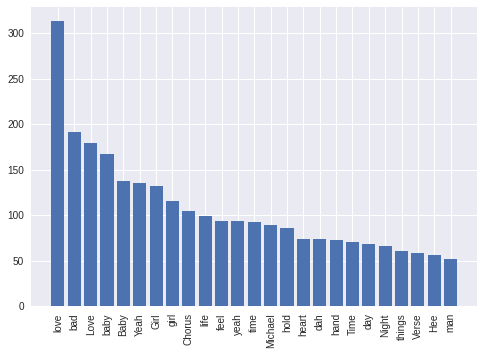

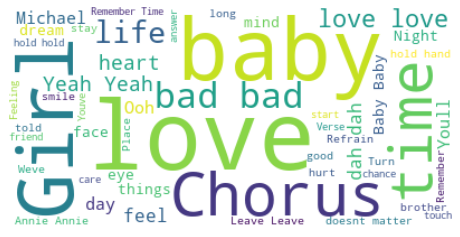

data_Bruno_Mars.txt


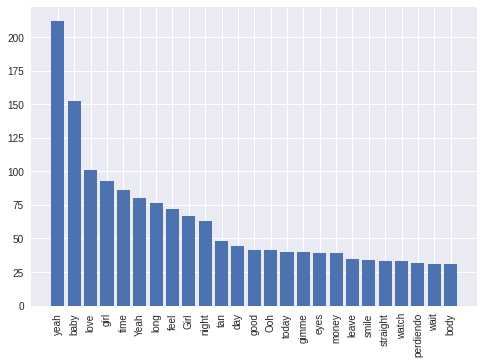

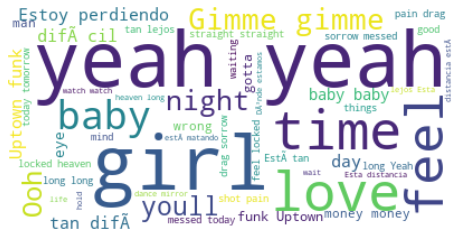

data_Bruce_Springsteen.txt


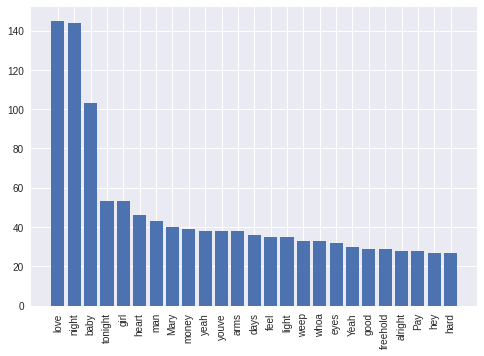

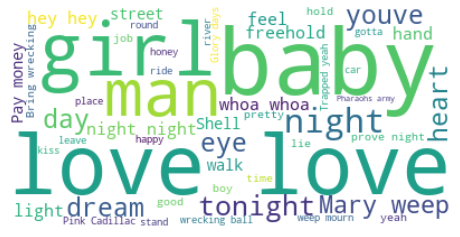

In [ ]:
# lyrics contains [X1, X2,...., X9] where Xi -> all the lyrics of one artists
lyrics = []

# artists refers to the name of the artists whose lyrics are in the dataset
artists = []

for i in os.listdir():
    if 'data_' in i:
        artists.append(i.replace('.txt', '').replace('data_', ''))
        print(i)
        
        file = open(i, 'r').read().splitlines() # splitting by line
        lyrics_st = ' '.join(file) # converting into a string

        # lyrics_st = lyrics_st.translate(str.maketrans('', '', string.punctuation)) # removing punctuations
        # lyrics_st1 = ' '.join([w for w in lyrics_st.split() if len(w)>2]) # removing words smaller than 3 characters
        # lyrics_cleaned  = [word for word in lyrics_st1.split() if word.lower() not in excluded_words] # removing stopwords + my word list + punctuation
        # lyrics.append(' '.join(lyr)) # Appending Xi to lyrics

        lyrics_cleaned = clean_data(lyrics_st)
        lyrics.append(lyrics_cleaned)

        # top 25 words
        a = Counter(lyrics_cleaned.split()).most_common(25)

        # bar charts for those 25 words
        plt.bar(*zip(*a))
        plt.xticks(rotation=90) # rotating x axis labels
        plt.show()

        wordcloud = WordCloud(max_words=50, background_color='white').generate(lyrics_cleaned)
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.show()
        

In [ ]:
tagged_data = [TaggedDocument(words=lyrics[i].split(), tags=str(i)) for i in range(len(lyrics))]

In [ ]:
tagged_data

[TaggedDocument(words=['easy', 'hurt', 'feelings', 'chance', 'Somethings', 'wrong', 'feel', 'minutes', 'Slim', 'Shady', 'feeling', 'somethings', 'happen', 'trouble', 'big', 'trouble', 'bananas', 'chances', 'doctor', 'ordered', 'feel', 'Rap', 'God', 'Rap', 'God', 'people', 'nod', 'nod', 'thinks', 'arms', 'long', 'slap', 'box', 'slap', 'box', 'rap', 'robot', 'Rapbot', 'rap', 'computer', 'genes', 'laptop', 'pocket', 'penll', 'halfcock', 'fat', 'knot', 'rap', 'profit', 'living', 'killing', 'Clinton', 'office', 'Monica', 'Lewinsky', 'feeling', 'nutsack', 'honest', 'rude', 'indecent', 'hell', 'syllables', 'killaholic', 'Kill', 'slickety', 'gibbedy', 'hibbedy', 'hip', 'hop', 'match', 'rappidy', 'rap', 'Packing', 'Mac', 'pack', 'backpack', 'rap', 'yep', 'yackidyyac', 'exact', 'time', 'attempt', 'lyrical', 'acrobat', 'stunts', 'practicing', 'break', 'motherfuckin', 'table', 'couple', 'faggots', 'crack', 'half', 'realized', 'ironic', 'signed', 'Aftermath', 'fact', 'blow', 'drop', 'Fbombs', 'feel

In [ ]:
# Counter(tagged_data[0].words)
# len(tagged_data[0].words)

In [ ]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in tqdm(range(max_epochs)):
    # print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
model.save_word2vec_format('doc_tensor.w2v', doctag_vec=True, word_vec=False) # we are implementing doc2vec hence doctag_vec parameter will be passed as True and word_vec as False. In case of word2vec, the opposite will be the case.
print("Model Saved")

2021-12-07 18:28:13,555 - doc2vec - INFO - collecting all words and their counts
2021-12-07 18:28:13,561 - doc2vec - INFO - PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-12-07 18:28:13,607 - doc2vec - INFO - collected 14327 word types and 9 unique tags from a corpus of 9 examples and 88050 words
2021-12-07 18:28:13,612 - word2vec - INFO - Loading a fresh vocabulary
2021-12-07 18:28:13,672 - word2vec - INFO - effective_min_count=1 retains 14327 unique words (100% of original 14327, drops 0)
2021-12-07 18:28:13,674 - word2vec - INFO - effective_min_count=1 leaves 88050 word corpus (100% of original 88050, drops 0)
2021-12-07 18:28:13,766 - word2vec - INFO - deleting the raw counts dictionary of 14327 items
2021-12-07 18:28:13,769 - word2vec - INFO - sample=0.001 downsamples 20 most-common words
2021-12-07 18:28:13,770 - word2vec - INFO - downsampling leaves estimated 84945 word corpus (96.5% of prior 88050)
2021-12-07 18:28:13,832 - base_any2vec - INFO - est

Model Saved


In [ ]:
%run word2vec2tensor.py -i doc_tensor.w2v -o 'lyrics'

2021-12-07 18:09:32,113 - word2vec2tensor - INFO - running word2vec2tensor.py -i doc_tensor.w2v -o lyrics
2021-12-07 18:09:32,114 - utils_any2vec - INFO - loading projection weights from doc_tensor.w2v
2021-12-07 18:09:32,121 - utils_any2vec - INFO - loaded (9, 20) matrix from doc_tensor.w2v
2021-12-07 18:09:32,665 - word2vec2tensor - INFO - 2D tensor file saved to lyrics_tensor.tsv
2021-12-07 18:09:32,666 - word2vec2tensor - INFO - Tensor metadata file saved to lyrics_metadata.tsv
2021-12-07 18:09:32,672 - word2vec2tensor - INFO - finished running word2vec2tensor.py


<Figure size 432x288 with 0 Axes>

In [ ]:
with open('lyrics_metadata.tsv', 'w', newline='') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\n')
    tsv_output.writerow(artists)

In [ ]:
# upload the two generated tsv files to http://projector.tensorflow.org/

In [ ]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("love".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# # to find most similar artists using tags
# similar_doc = model.docvecs.most_similar('0')
# print(similar_doc)


# # to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
# print(model.docvecs['1'])

2021-12-07 18:18:18,320 - utils - INFO - loading Doc2Vec object from d2v.model
2021-12-07 18:18:18,468 - utils - INFO - loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
2021-12-07 18:18:18,469 - utils - INFO - loading trainables recursively from d2v.model.trainables.* with mmap=None
2021-12-07 18:18:18,470 - utils - INFO - loading wv recursively from d2v.model.wv.* with mmap=None
2021-12-07 18:18:18,477 - utils - INFO - loading docvecs recursively from d2v.model.docvecs.* with mmap=None
2021-12-07 18:18:18,479 - utils - INFO - loaded d2v.model


V1_infer [-0.01507032  0.00773229 -0.00184727  0.02099714 -0.02086388 -0.01480766
 -0.01733847  0.00053026 -0.014647    0.01708944  0.02435288  0.01540901
 -0.00410762 -0.01932006  0.01976984 -0.02684271 -0.0071781  -0.00310166
 -0.0010094  -0.00650947]
